<h1>Fusion - Anomaly Detection</h1>



In [278]:
import wget
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [279]:
plt.rcParams["figure.figsize"] = (20,10)

In [333]:
print('downloading data')
#data_url = 'https://api.thingspeak.com/channels/35939/feeds.csv?results=8000'
data_file = 'feeds.csv' #data_file = wget.download(data_url)
df = pd.read_csv(data_file)

def to_date(string):
    return datetime.datetime.strptime(string, '%Y-%m-%d %H:%M:%S UTC')

df.created_at = df.created_at.apply(to_date)
df.set_index('created_at', inplace=True)
print(df.shape)
df.head()

downloading data
(299412, 5)


,entry_id,field1,field2,field3,field4
created_at,,,,,
2018-07-19 17:59:04,1,212.2,44.0,22.000,23.375
2018-07-19 17:59:33,2,211.9,44.0,22.062,23.375
2018-07-19 17:59:48,3,202.6,44.5,22.062,23.437
2018-07-19 18:00:03,4,210.2,44.5,22.000,23.437
2018-07-19 18:00:21,5,210.9,44.5,22.000,23.437


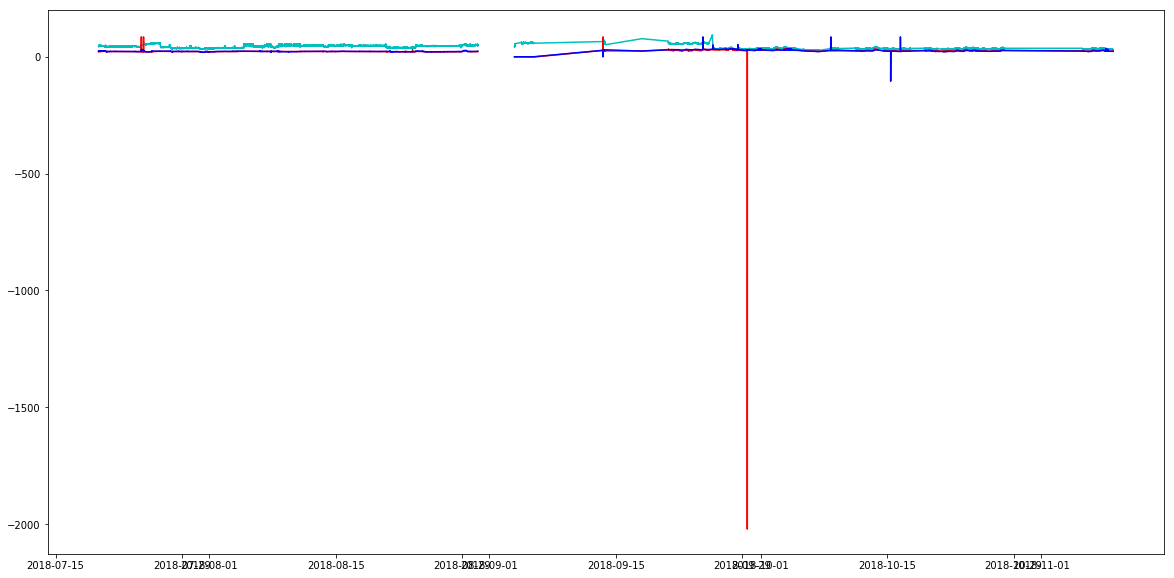

In [281]:
plt.plot(df.field2,"c",df.field3,"r",df.field4,"b")
plt.show()

In [334]:
df3 = pd.DataFrame([])
df3['field2'] = df['field2'].resample('1T').mean()
df3['field3'] = df['field3'].resample('1T').mean()
df3['field4'] = df['field4'].resample('1T').mean()
df3.head()

,field2,field3,field4
created_at,,,
2018-07-19 17:59:00,44.166667,22.041333,23.395667
2018-07-19 18:00:00,44.700000,21.979000,23.458000
2018-07-19 18:01:00,45.100000,21.937000,23.562000
2018-07-19 18:02:00,45.100000,21.979000,23.562000
2018-07-19 18:03:00,45.100000,21.968500,23.531000


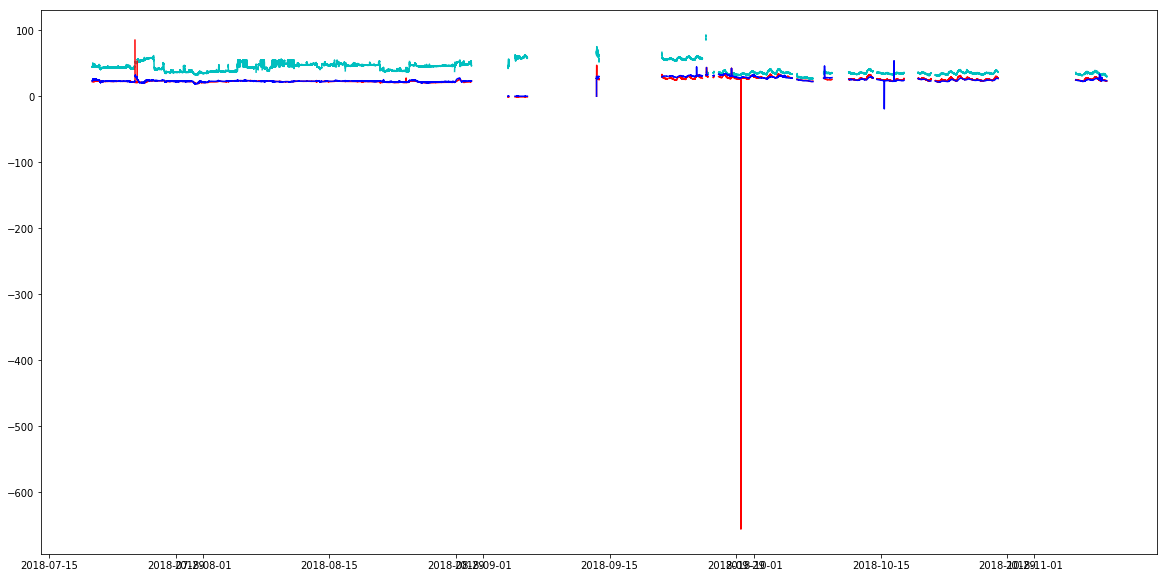

In [335]:
plt.plot(df3.field2,"c",df3.field3,"r",df3.field4,"b")
plt.show()

In [336]:
df3.to_pickle('feeds.pickle')

In [337]:
len_df = int(df3.shape[0]/3)
df_train = df3[:len_df]
df_test = df3[len_df:]

In [338]:
print(df_train.shape, df_test.shape)

(53885, 3) (107772, 3)


In [339]:
def rmse(df1,df2):
    diff = (df1-df2) * (df1-df2)
    return diff.mean()**0.5
print("23",rmse(df_train['field2'],df_train['field3']))
print("24",rmse(df_train['field2'],df_train['field4']))
print("34",rmse(df_train['field3'],df_train['field4']))
print("43",rmse(df_train['field4'],df_train['field3']))

23 22.801964398158052
24 22.307950230872535
34 1.0598391049925824
43 1.0598391049925824


num_layer = 5
num_val = 3

vec = []
xvec = []

for x in range(num_layer):
    vec.append([np.random.normal(0,.1) for _ in range(num_val)])
        
for x in range(num_val):
    xvec.append([np.random.normal(0,.1) for _ in range(num_layer)])
for x in vec:
    print("vec ",x)
for x in xvec:
    print("xvec ",x)   

for line in df_train.iterrows():
    layer = list(line[1])
    print("layer",layer)
    values=[0 for _ in range(num_layer)]
    print(values)
    for n in range(num_layer):
        print("n ",n)
        values[n] = 0
        for v in range(num_val):
            print("v ",v)
            values[n] += layer[v]*vec[v][n] 
    print("values",values)


    for i in xvec:
        print(i)
    
    break

In [340]:
df3.head()

,field2,field3,field4
created_at,,,
2018-07-19 17:59:00,44.166667,22.041333,23.395667
2018-07-19 18:00:00,44.700000,21.979000,23.458000
2018-07-19 18:01:00,45.100000,21.937000,23.562000
2018-07-19 18:02:00,45.100000,21.979000,23.562000
2018-07-19 18:03:00,45.100000,21.968500,23.531000


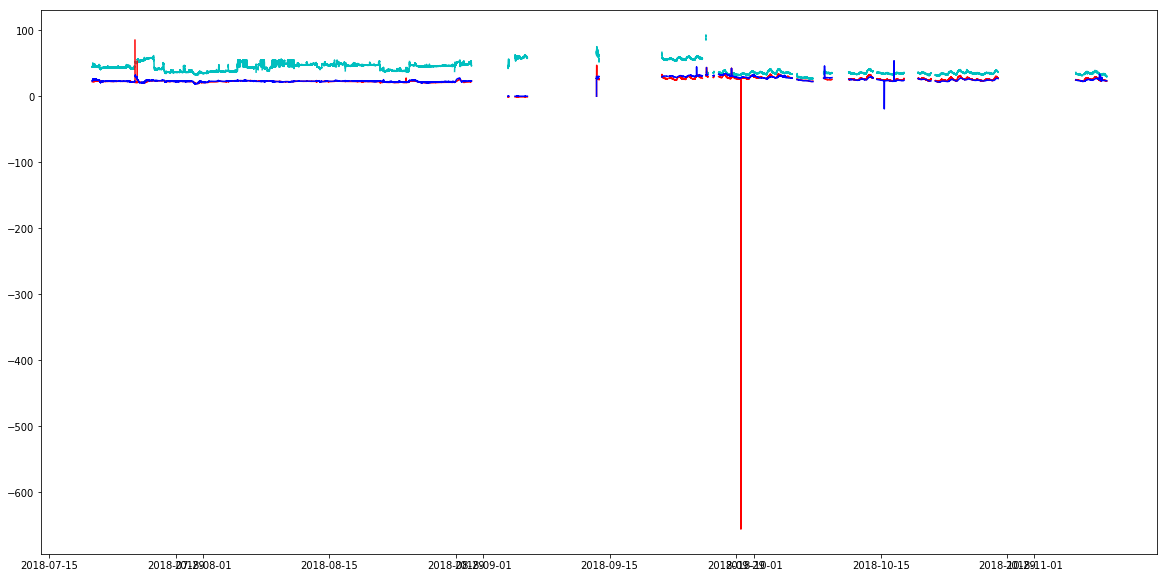

In [341]:
plt.plot(df3.field2,"c",df3.field3,"r",df3.field4,"b")
plt.show()

In [342]:
df3['field4_mean'] = df3.field4.rolling(30, min_periods=1).mean()

In [343]:
df3['field4_mean_cont'] = 0
vec=[]
m = ''
for line in df3.iterrows():
    if m == '':
        m = float(line[1][2])
    else:
        if not np.isnan(line[1][2]):
            m = (m * 29 + line[1][2])/30
        #print( line[1][0],m)
    vec.append(m)
df3['field4_mean_cont'] = vec
df3.head()

,field2,field3,field4,field4_mean,field4_mean_cont
created_at,,,,,
2018-07-19 17:59:00,44.166667,22.041333,23.395667,23.395667,23.395667
2018-07-19 18:00:00,44.700000,21.979000,23.458000,23.426833,23.397744
2018-07-19 18:01:00,45.100000,21.937000,23.562000,23.471889,23.403220
2018-07-19 18:02:00,45.100000,21.979000,23.562000,23.494417,23.408512
2018-07-19 18:03:00,45.100000,21.968500,23.531000,23.501733,23.412595


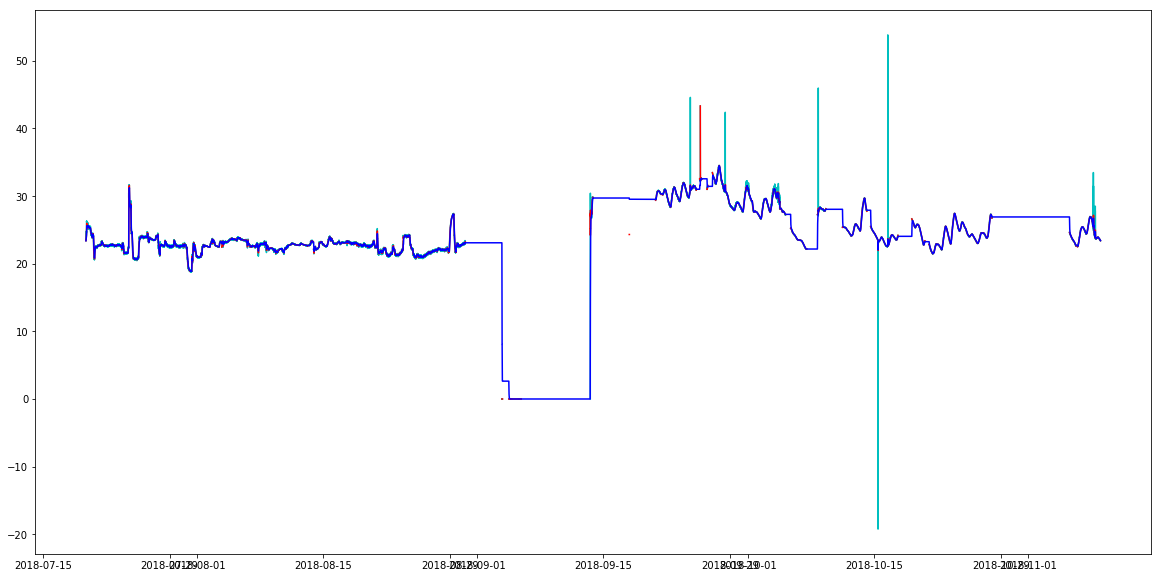

In [344]:
plt.plot(df3.field4,"c",df3.field4_mean,"r",df3.field4_mean_cont,"b")
plt.show()

In [345]:
df3['field4_sd'] = df3.field4.rolling(30, min_periods=1).std()
df3['field4_sd_cont'] = 0
vec=[]
m = ''
for line in df3.iterrows():
    if m == '':
        m = float(line[1][2])
        sd = 0
    else:
        if not np.isnan(line[1][2]):
            m = (m * 29 + line[1][2])/30
            diff = abs(m - line[1][2])
            sd = (((29*(sd) + diff)))/(30)
        #print( line[1][0],m)
    vec.append(sd)
df3['field4_sd_cont'] = vec

df3['field4_sd_run'] = 0
vec=[]
m = ''
sm = 0
for line in df3.iterrows():
    if m == '':
        n = 1
        r = float(line[1][2])
        m = float(line[1][2])
        sm += (r-m)**2/n
        variance = 0
    else:
        if not np.isnan(line[1][2]):
            n = min(30, n+1)
            r = float(line[1][2])
            m = (m*(n-1)+r)/n
            d = (r-m)**2
            variance = ((n-1)*(variance) + d)/(n+1)
    vec.append(variance**0.5)
df3['field4_sd_run'] = vec


0.34870005060921716
0.3056039631824028


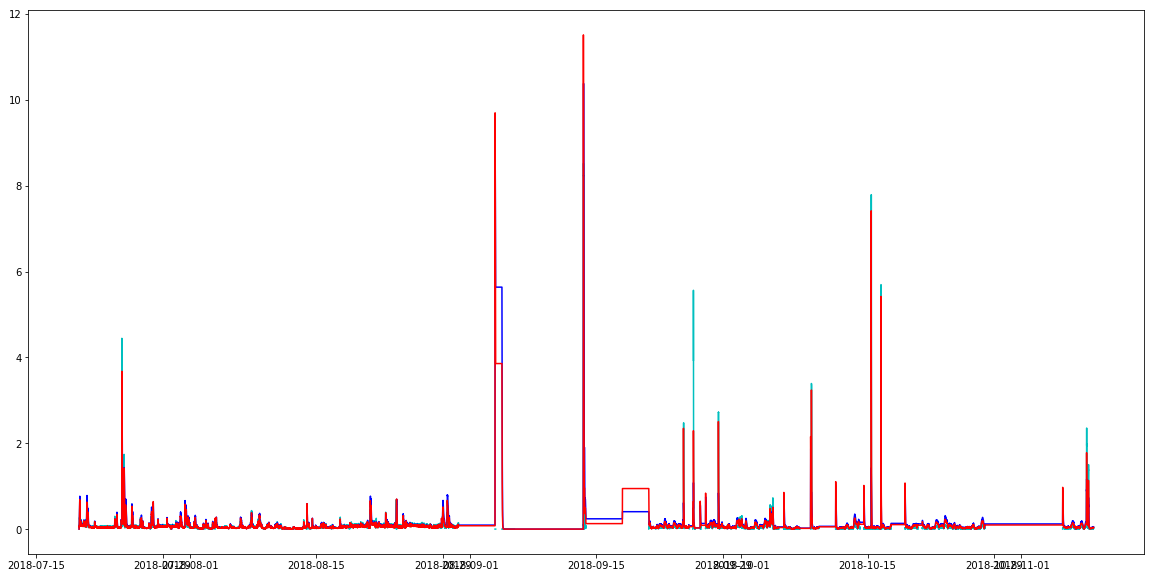

In [346]:
print(rmse(df3.field4_sd,df3.field4_sd_cont))
print(rmse(df3.field4_sd,df3.field4_sd_run))
plt.plot(df3.field4_sd,"c",df3.field4_sd_cont,"b",df3.field4_sd_run,"r")
plt.show()

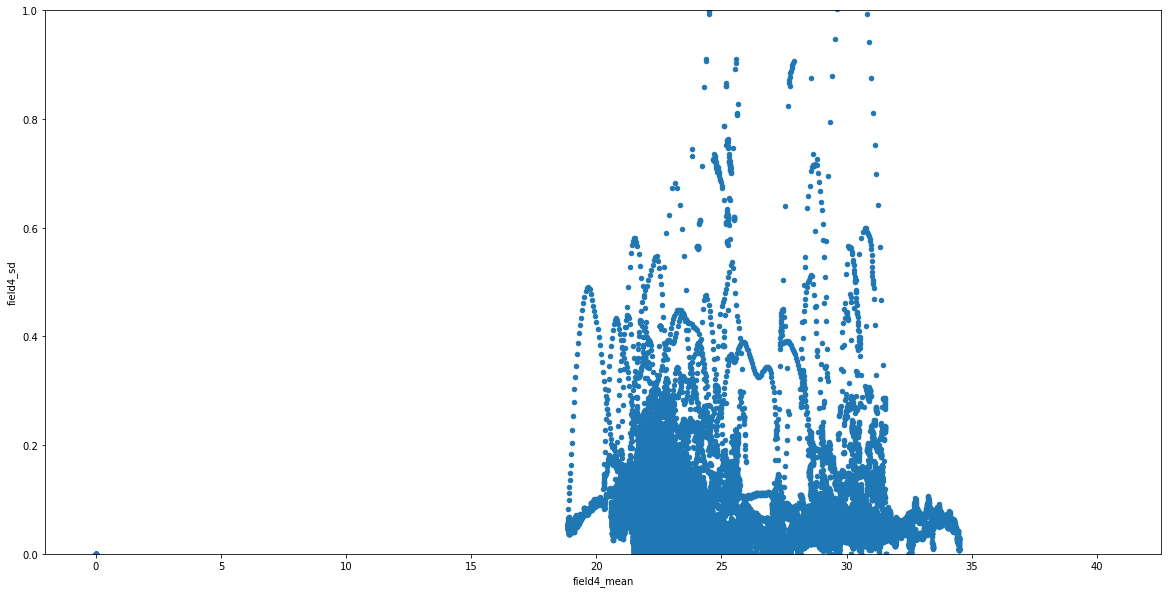

In [347]:
df3.plot(kind='scatter', x='field4_mean',y='field4_sd', ylim=(0,1))

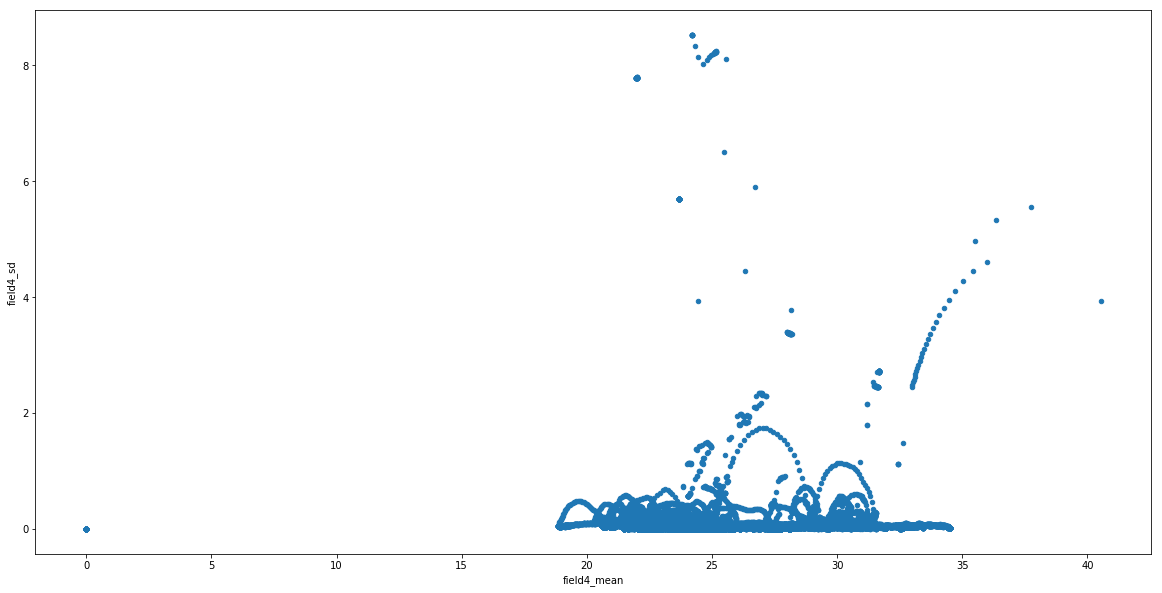

In [348]:
df3.plot(kind='scatter', x='field4_mean',y='field4_sd')

In [361]:
df4 = df3.reset_index()
df4['day'] = df4['created_at'].apply(datetime.datetime.toordinal)
df4.head()

,created_at,field2,field3,field4,field4_mean,field4_mean_cont,field4_sd,field4_sd_cont,field4_sd_run,day
0,2018-07-19 17:59:00,44.166667,22.041333,23.395667,23.395667,23.395667,NaN,0.000000,0.000000,736894
1,2018-07-19 18:00:00,44.700000,21.979000,23.458000,23.426833,23.397744,0.044076,0.002009,0.017994,736894
2,2018-07-19 18:01:00,45.100000,21.937000,23.562000,23.471889,23.403220,0.084032,0.007234,0.046818,736894
3,2018-07-19 18:02:00,45.100000,21.979000,23.562000,23.494417,23.408512,0.082083,0.012109,0.047208,736894
4,2018-07-19 18:03:00,45.100000,21.968500,23.531000,23.501733,23.412595,0.072944,0.015653,0.040355,736894


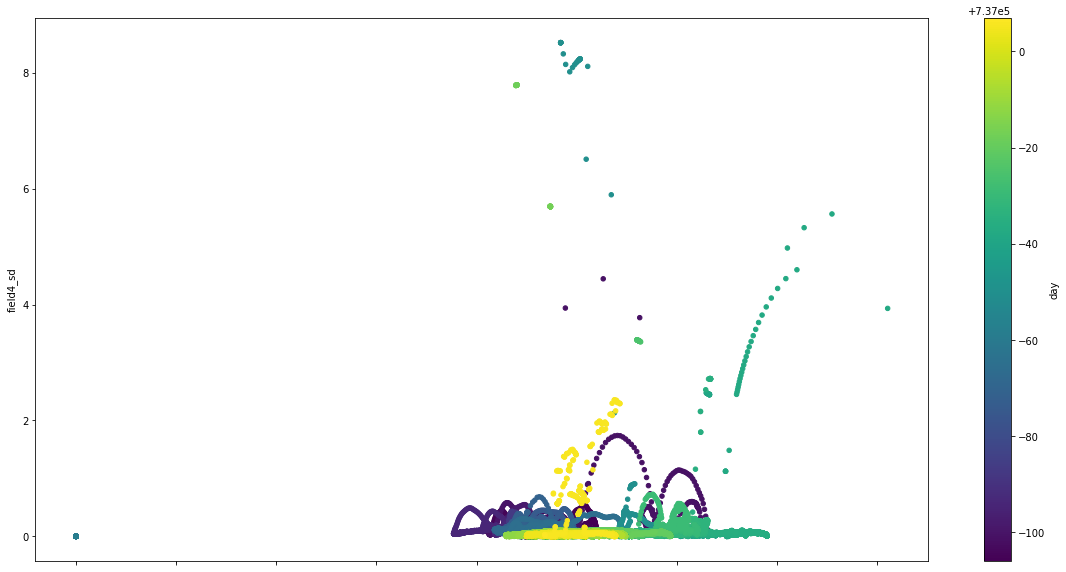

In [365]:
df4.plot(kind='scatter', x='field4_mean',y='field4_sd', c='day',  colormap='viridis')

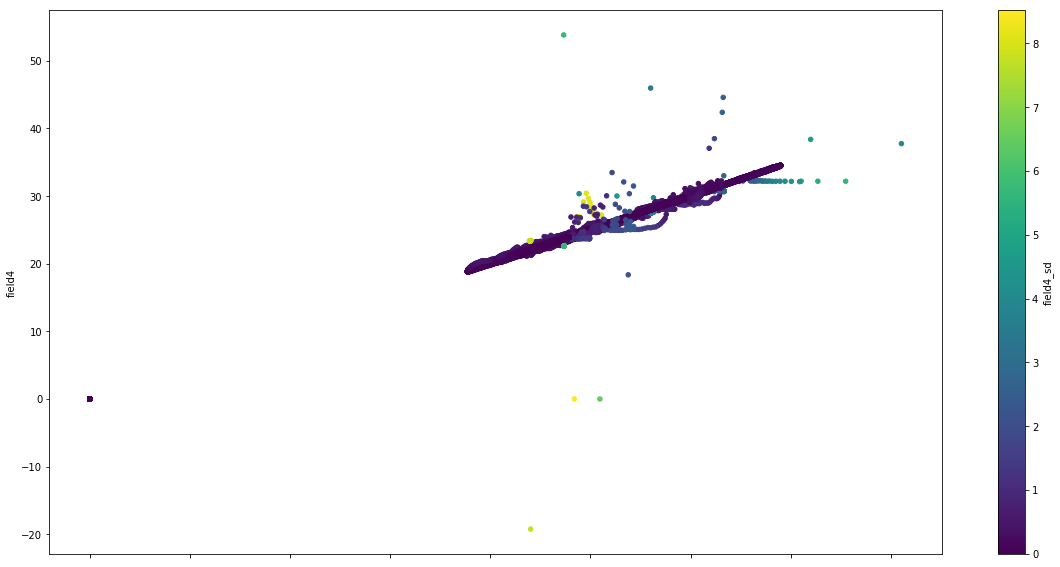

In [367]:
df4.plot(kind='scatter', x = 'field4_mean', y='field4', c='field4_sd',  colormap='viridis')